In [69]:
import pandas as pd
import numpy as np
from tensorflow import keras as kr
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [70]:
merged_data = pd.read_excel("final_data.xlsx")

In [71]:
keep_columns=['Open','High','Low','Volume','Subjectivity','Polarity','Compound']    

In [72]:
all_input_values=merged_data[keep_columns].values #numpy array.

In [73]:
model_input=[]
count_day=5
pred_day_count=1

j=0
temp=[]
for i in range(0,len(all_input_values)-count_day):
    temp=all_input_values[i:i+count_day]    
    model_input.append(temp)


print(len(model_input))  
print("-------------")
print(model_input[1])
print("-------------")
print(model_input[2])

741
-------------
[[3.06100006e+02 3.15130005e+02 2.98799988e+02 1.16586480e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.07000000e+02 3.09399994e+02 2.97380005e+02 6.96518400e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.06000000e+02 3.18000000e+02 3.02730011e+02 7.39411600e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.21720001e+02 3.36739990e+02 3.17750793e+02 7.55122500e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.41959991e+02 3.44010010e+02 3.27019989e+02 7.00851600e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]]
-------------
[[3.07000000e+02 3.09399994e+02 2.97380005e+02 6.96518400e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.06000000e+02 3.18000000e+02 3.02730011e+02 7.39411600e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.21720001e+02 3.36739990e+02 3.17750793e+02 7.55122500e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.41959991e+02 3.44010010e+02 3.27019989e+02 7.00851600e+06
  5.00000000e-01 0.000000

In [74]:
model_input=np.array(model_input)
print(model_input.shape)

(741, 5, 7)


In [75]:
all_close_values = merged_data['Close'].values

In [76]:
model_close_values=[]
for i in range(count_day,len(all_close_values)):
    model_close_values.append(all_close_values[i])

In [77]:
model_close_values=np.array(model_close_values)
print(model_close_values.shape)

print(model_input.shape)

(741,)
(741, 5, 7)


In [78]:
count_day

5

In [79]:
training_size=int(len(model_input)*0.75)
test_size=len(model_input)-training_size
all_input_values_train, all_input_values_test=model_input[0:training_size,:],model_input[training_size:len(model_input),:]

training_size=int(len(model_close_values)*0.75)
all_close_values_train, all_close_values_test = model_close_values[0:training_size], model_close_values[training_size:len(model_close_values)]

In [80]:
all_close_values_train[0:count_day]

array([335.350006, 338.529999, 344.970001, 347.26001 , 334.399994])

In [81]:
all_close_values_train=np.array(all_close_values_train)
all_close_values_test=np.array(all_close_values_test)

In [82]:
all_input_values_train[0:2]

array([[[3.37790009e+02, 3.39209991e+02, 3.25260010e+02, 6.30233800e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.06100006e+02, 3.15130005e+02, 2.98799988e+02, 1.16586480e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.07000000e+02, 3.09399994e+02, 2.97380005e+02, 6.96518400e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.06000000e+02, 3.18000000e+02, 3.02730011e+02, 7.39411600e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.21720001e+02, 3.36739990e+02, 3.17750793e+02, 7.55122500e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00]],

       [[3.06100006e+02, 3.15130005e+02, 2.98799988e+02, 1.16586480e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.07000000e+02, 3.09399994e+02, 2.97380005e+02, 6.96518400e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.06000000e+02, 3.18000000e+02, 3.02730011e+02, 7.39411600e+06,
        

In [83]:
print(all_input_values_train.shape, all_input_values_test.shape, all_close_values_train.shape, all_close_values_test.shape)

(555, 5, 7) (186, 5, 7) (555,) (186,)


In [84]:
all_close_values_train.shape

(555,)

In [85]:
all_input_values_train=np.reshape(all_input_values_train,(all_input_values_train.shape[0],all_input_values_train.shape[1]*all_input_values_train.shape[2]))
print(all_input_values_train.shape)

(555, 35)


In [86]:
all_input_values_test=np.reshape(all_input_values_test,(all_input_values_test.shape[0], all_input_values_test.shape[1]*all_input_values_test.shape[2]))
print(all_input_values_test.shape)

(186, 35)


In [87]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
all_input_values_train=scaler.fit_transform(all_input_values_train) # hem fit ediyor hem de scale ediyor
all_input_values_test=scaler.transform(all_input_values_test) # sadece transform olacak. cünkü model bu veriyi eğitim esnasında görmeyecek 


In [88]:
all_close_values_train = np.array([all_close_values_train]).T
all_close_values_test = np.array([all_close_values_test]).T

In [89]:
print(all_input_values_train.shape, all_input_values_test.shape, all_close_values_train.shape, all_close_values_test.shape)

(555, 35) (186, 35) (555, 1) (186, 1)


In [90]:
scaler2 = StandardScaler()
all_close_values_train = scaler2.fit_transform(all_close_values_train)
all_close_values_test = scaler2.transform(all_close_values_test)

In [91]:
all_close_values_test

array([[1.57033681],
       [1.40670355],
       [1.45863112],
       [1.34738705],
       [1.30931343],
       [1.43415526],
       [1.59994385],
       [1.56823316],
       [1.71857683],
       [1.72150165],
       [1.61554254],
       [1.68137574],
       [1.64658647],
       [1.77466065],
       [2.08427652],
       [1.92987901],
       [1.96384744],
       [1.96861971],
       [1.83957028],
       [1.86194217],
       [1.99088888],
       [1.86553406],
       [1.91535798],
       [1.96051235],
       [1.78882277],
       [1.73576649],
       [1.64648374],
       [1.81293941],
       [1.68702023],
       [1.62903759],
       [1.61538877],
       [1.57741787],
       [1.62272633],
       [1.40039197],
       [1.33963891],
       [1.19950625],
       [1.10611861],
       [1.19873644],
       [1.13249298],
       [1.1378293 ],
       [1.06388905],
       [1.18354833],
       [1.15327422],
       [1.2844273 ],
       [1.27544773],
       [1.34954206],
       [1.40967941],
       [1.380

In [92]:
all_close_values_test.shape

(186, 1)

In [93]:
all_input_values_train.shape

(555, 35)

In [94]:
all_input_values_test.shape

(186, 35)

In [95]:
# Taban model ile ana model birleştirilir. 

model=Sequential()
model.add(LSTM(units = 50, input_shape = (all_input_values_train.shape[1],1), return_sequences=True))
model.add(LSTM(units=50))
# model.add(LSTM(units=50,return_sequences=True))
# model.add(LSTM(units=50))
model.add(Flatten())
model.add(Dense(units = 128))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [96]:
# model = model(inputs=baseModel.input, outputs=headModel)

In [97]:
opt = kr.optimizers.Adam(lr=0.001, decay=1e-4)

/home/serhatoner/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [98]:
model.compile(optimizer=opt, loss='mean_squared_error') #learning rate atanabilir.

In [99]:
type(all_input_values_train)

numpy.ndarray

In [100]:
model.fit(all_input_values_train, all_close_values_train, epochs=15,batch_size=16,verbose=1)

Epoch 1/25
35/35 [==============================] - 7s 42ms/step - loss: 0.5746
Epoch 2/25
35/35 [==============================] - 2s 48ms/step - loss: 0.1246
Epoch 3/25
35/35 [==============================] - 2s 49ms/step - loss: 0.1317
Epoch 4/25
35/35 [==============================] - 2s 48ms/step - loss: 0.1294
Epoch 5/25
35/35 [==============================] - 2s 48ms/step - loss: 0.1068
Epoch 6/25
35/35 [==============================] - 2s 51ms/step - loss: 0.1005
Epoch 7/25
35/35 [==============================] - 2s 49ms/step - loss: 0.1083
Epoch 8/25
35/35 [==============================] - 2s 55ms/step - loss: 0.1130
Epoch 9/25
35/35 [==============================] - 2s 42ms/step - loss: 0.1118
Epoch 10/25
35/35 [==============================] - 1s 39ms/step - loss: 0.1029
Epoch 11/25
35/35 [==============================] - 2s 46ms/step - loss: 0.0996
Epoch 12/25
35/35 [==============================] - 1s 42ms/step - loss: 0.0950
Epoch 13/25
35/35 [==================

In [101]:
train_predict=model.predict(all_input_values_train)
test_predict=model.predict(all_input_values_test)

#train_predict = train_predict.reshape((train_predict.shape[0],5,1))
#test_predict = test_predict.reshape((test_predict.shape[0],5,1))

# print('all_close_values_train shape: ', all_close_values_train.shape, '\nall_close_values_train', all_close_values_train[0:5], '\n')
# print('all_close_values_train_predict shape: ', train_predict.shape, '\nall_close_values_train_pred', train_predict[0:5], '\n')
# print('all_close_values_test shape: ', all_close_values_test.shape, '\nall_close_values_test', all_close_values_test[0:5], '\n')
# print('all_close_values_test_pred shape: ', test_predict.shape, '\nall_close_values_test_pred', test_predict[0:5])

print('all_close_values_train shape: ', all_close_values_train.shape)

print('all_close_values_test shape: ', all_close_values_test.shape)
print('all_close_values_test_pred shape: ', test_predict.shape)
print('all_close_values_test_pred shape: ', test_predict.shape)


all_close_values_train shape:  (555, 1)
all_close_values_test shape:  (186, 1)
all_close_values_test_pred shape:  (186, 1)
all_close_values_test_pred shape:  (186, 1)


In [102]:
test_predict[0]

array([1.439861], dtype=float32)

In [103]:
score = model.evaluate(all_input_values_test, all_close_values_test)

6/6 [==============================] - 1s 14ms/step - loss: 0.3693


In [104]:
model.evaluate(all_input_values_train, all_close_values_train)

18/18 [==============================] - 0s 14ms/step - loss: 0.0717


0.07173318415880203

In [105]:
score

0.36933743953704834

In [106]:
# test_predict = test_predict.reshape((test_predict.shape[0],5))

In [107]:
# train_predict = train_predict.reshape((train_predict.shape[0],5))

In [108]:
test_predict = scaler2.inverse_transform(test_predict)
train_predict = scaler2.inverse_transform(train_predict)

In [109]:
train_predict.shape

(555, 1)

In [110]:
#test_predict=test_predict.reshape((test_predict.shape[0]*test_predict.shape[1],1))

In [111]:
test_predict.shape

(186, 1)

In [112]:
# train_predict = np.array(train_predict).T
# test_predict = np.array(test_predict).T

In [113]:
all_close_values_test=np.array(all_close_values_test)
print(all_close_values_test.shape)

(186, 1)


In [114]:
test_predict.shape

(186, 1)

In [115]:
all_close_values_train = scaler2.inverse_transform(all_close_values_train)
all_close_values_test = scaler2.inverse_transform(all_close_values_test)

In [116]:
all_close_values_test.shape

(186, 1)

In [117]:
mape_test = mean_absolute_percentage_error(all_close_values_test, test_predict)
mape_train = mean_absolute_percentage_error(all_close_values_train, train_predict)
print(mape_test)
print(mape_train)

0.10861049203054816
0.13871137634576686


In [118]:
rmse = np.sqrt(mean_squared_error(all_close_values_test, test_predict)) #neden yüksek çıkıyor, mape ile karşılastır tekrar bak
print(rmse)

118.43878719129684


In [119]:
train_predict=np.array(train_predict)
train_predict.shape

(555, 1)

In [120]:
test=all_close_values[count_day:]
train_predict[1]

array([299.31134], dtype=float32)

In [121]:
model_close_values

array([ 335.350006,  338.529999,  344.970001,  347.26001 ,  334.399994,
        344.429993,  346.049988,  347.309998,  302.26001 ,  298.920013,
        287.589996,  291.51001 ,  297.040009,  296.380005,  297.459991,
        308.769989,  307.019989,  312.209991,  312.890015,  321.350006,
        317.220001,  307.51001 ,  305.799988,  312.839996,  311.809998,
        308.170013,  303.769989,  307.880005,  305.640015,  302.559998,
        291.230011,  294.709991,  298.769989,  297.859985,  314.73999 ,
        319.880005,  294.790009,  285.359985,  276.540009,  276.23999 ,
        276.589996,  284.140015,  290.920013,  283.359985,  288.959991,
        289.959991,  275.429993,  269.48999 ,  267.470001,  273.600006,
        274.019989,  264.529999,  260.420013,  267.769989,  274.829987,
        278.619995,  279.859985,  289.179993,  285.880005,  291.809998,
        267.779999,  274.959991,  273.200012,  272.309998,  276.059998,
        268.420013,  267.700012,  266.380005,  273.359985,  271.

In [122]:
all_close_values

array([ 332.799988,  310.119995,  300.359985,  317.690002,  334.959991,
        335.350006,  338.529999,  344.970001,  347.26001 ,  334.399994,
        344.429993,  346.049988,  347.309998,  302.26001 ,  298.920013,
        287.589996,  291.51001 ,  297.040009,  296.380005,  297.459991,
        308.769989,  307.019989,  312.209991,  312.890015,  321.350006,
        317.220001,  307.51001 ,  305.799988,  312.839996,  311.809998,
        308.170013,  303.769989,  307.880005,  305.640015,  302.559998,
        291.230011,  294.709991,  298.769989,  297.859985,  314.73999 ,
        319.880005,  294.790009,  285.359985,  276.540009,  276.23999 ,
        276.589996,  284.140015,  290.920013,  283.359985,  288.959991,
        289.959991,  275.429993,  269.48999 ,  267.470001,  273.600006,
        274.019989,  264.529999,  260.420013,  267.769989,  274.829987,
        278.619995,  279.859985,  289.179993,  285.880005,  291.809998,
        267.779999,  274.959991,  273.200012,  272.309998,  276.

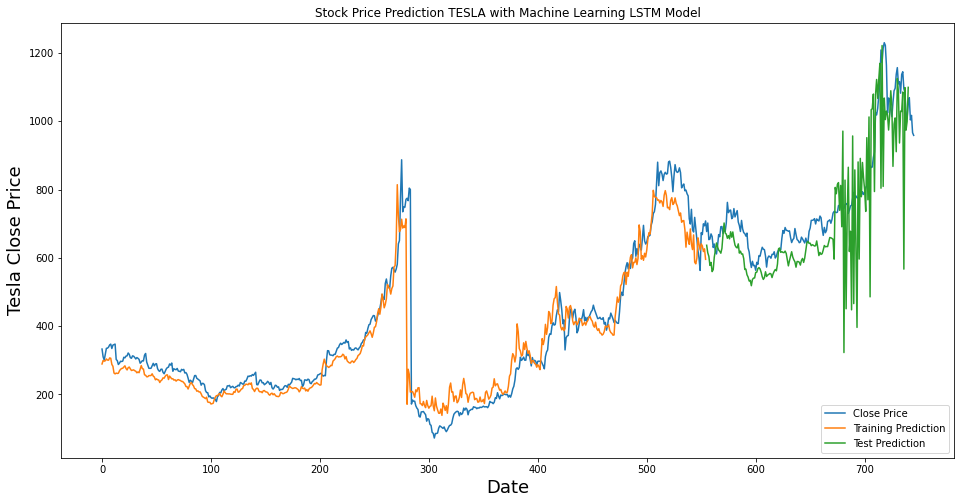

In [123]:
#look_back = 7
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction TESLA with Machine Learning LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tesla Close Price', fontsize=18)
plt.plot(all_close_values)
plt.plot(train_predict)
plt.plot(np.arange(len(test_predict)) + len(all_close_values_train), test_predict)
plt.legend(['Close Price', 'Training Prediction', 'Test Prediction'], loc='lower right')
plt.show() 

In [124]:
last_count_days = all_input_values[len(all_input_values)-count_day:]

In [125]:
last_count_days

array([[ 1.05270996e+03,  1.07238000e+03,  1.03300000e+03,
         1.39688000e+07,  4.73778040e-01,  1.56544667e-01,
         7.90600000e-01],
       [ 1.06064001e+03,  1.06248999e+03,  1.00235999e+03,
         1.98128000e+07,  4.44949495e-01,  7.24747475e-02,
         9.41800000e-01],
       [ 1.00875000e+03,  1.02097998e+03,  9.82530029e+02,
         1.98550000e+07,  5.95344828e-01,  2.19166667e-01,
         9.04100000e-01],
       [ 1.00109003e+03,  1.00500000e+03,  9.51419983e+02,
         2.61985000e+07,  6.50000000e-01,  1.03409091e-01,
        -3.19700000e-01],
       [ 9.45000000e+02,  9.66409973e+02,  9.30000000e+02,
         2.35330000e+07,  3.57913165e-01,  1.68137255e-01,
        -9.34900000e-01]])

In [126]:
last_count_days.shape

(5, 7)

In [127]:
last_count_days= np.array(last_count_days)

In [128]:
last_count_days

array([[ 1.05270996e+03,  1.07238000e+03,  1.03300000e+03,
         1.39688000e+07,  4.73778040e-01,  1.56544667e-01,
         7.90600000e-01],
       [ 1.06064001e+03,  1.06248999e+03,  1.00235999e+03,
         1.98128000e+07,  4.44949495e-01,  7.24747475e-02,
         9.41800000e-01],
       [ 1.00875000e+03,  1.02097998e+03,  9.82530029e+02,
         1.98550000e+07,  5.95344828e-01,  2.19166667e-01,
         9.04100000e-01],
       [ 1.00109003e+03,  1.00500000e+03,  9.51419983e+02,
         2.61985000e+07,  6.50000000e-01,  1.03409091e-01,
        -3.19700000e-01],
       [ 9.45000000e+02,  9.66409973e+02,  9.30000000e+02,
         2.35330000e+07,  3.57913165e-01,  1.68137255e-01,
        -9.34900000e-01]])

In [129]:
last_count_days.shape

(5, 7)

In [130]:
last_count_days = np.reshape(last_count_days,(1, (last_count_days.shape[0]*last_count_days.shape[1])))

In [131]:
last_count_days.shape

(1, 35)

In [132]:
prediction = model.predict(last_count_days)

In [133]:
prediction

array([[3.5387974]], dtype=float32)

In [134]:
prediction  = scaler2.inverse_transform(prediction)

In [135]:
prediction

array([[1045.7869]], dtype=float32)

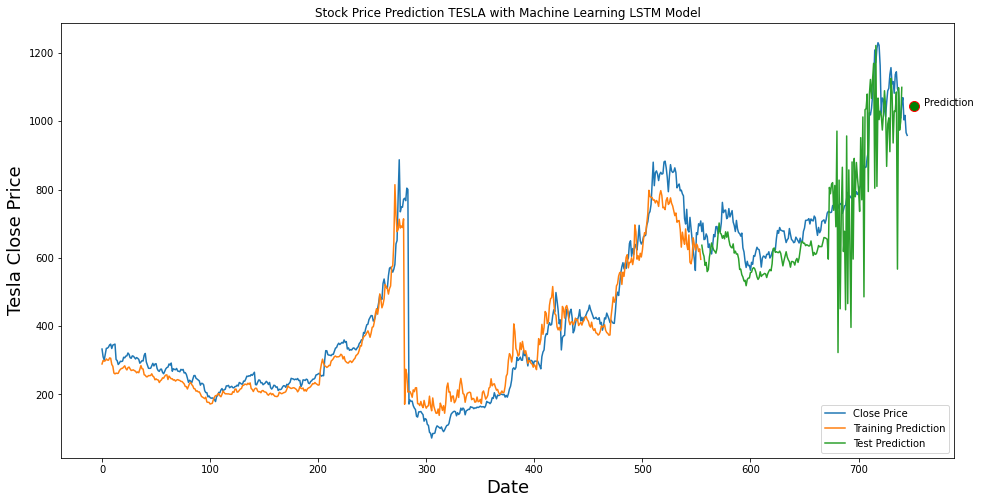

In [136]:
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction TESLA with Machine Learning LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tesla Close Price', fontsize=18)
plt.plot(all_close_values)
plt.plot(train_predict)
plt.plot(np.arange(len(test_predict)) + len(all_close_values_train), test_predict)
plt.plot(len(all_input_values)+count_day, prediction, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.annotate("Prediction",(len(all_input_values)+count_day+10, prediction))
plt.legend(['Close Price', 'Training Prediction', 'Test Prediction'], loc='lower right')
plt.show() 